# Projet 3 - Concevez une application au service de la santé publique

# Exploration des données

## 1/ Chargement des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

## 2/ Chargement du dataframe

In [2]:
data = pd.read_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/openfoodfacts_cleaned.csv')

#S'assurer que le colonne 'code' est d'un type objet
data['code'] = data['code'].astype(str)

C:\Users\raflg\AppData\Local\Temp\ipykernel_1228\4065673089.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/openfoodfacts_cleaned.csv')


## 3/ Analyse des variables catégorielles pour le choix de la macro analyse

In [3]:
print(len(data['pnns_groups_2'].unique()))
print(len(data['additives_n'].unique()))
print(len(data['countries_en'].unique()))
print(len(data['categories_en'].unique()))

40
38
3592
58294


In [4]:
#Choix d'osberver les 1O 'pnns' les plus représentés
date_eda = data[data['pnns_groups_2']!='unknown'].copy()
pnns_ = date_eda['pnns_groups_2'].value_counts().head(10).index.tolist()

df_eda = date_eda[date_eda['pnns_groups_2'].isin(pnns_)].copy()

In [5]:
df_eda.describe()

,additives_n,energy-kcal_100g,energy_100g,nutrition-score-fr_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy-kcal_100g_adj,energy-kJ_100g
count,232280.000000,328472.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000,345581.000000
mean,2.180868,249.050739,1037.963680,8.654368,12.444374,5.145069,24.509054,11.293257,1.736425,8.784003,0.912651,0.362969,7.946517,245.163085,1026.449559
std,3.182418,158.426324,665.084295,9.122308,12.726170,6.419264,26.505883,15.989778,1.664434,7.636927,0.838847,0.338180,15.975693,156.150177,653.769560
min,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,104.000000,435.000000,1.000000,1.600000,0.300000,3.000000,0.600000,0.500000,3.000000,0.100000,0.100000,0.000000,102.000000,427.000000
50%,1.000000,240.000000,996.000000,9.000000,7.900000,2.100000,10.700000,3.300000,1.400000,6.200000,0.800000,0.300000,0.000000,235.000000,984.000000
75%,3.000000,372.000000,1552.000000,16.000000,21.900000,8.200000,50.700000,16.100000,2.500000,13.200000,1.400000,0.600000,11.400000,369.000000,1545.000000
max,39.000000,900.000000,31246.000000,36.000000,72.000000,24.000000,82.600000,60.700000,10.200000,30.000000,3.900000,1.500000,100.000000,725.000000,3035.000000


## 4/ Visualisation

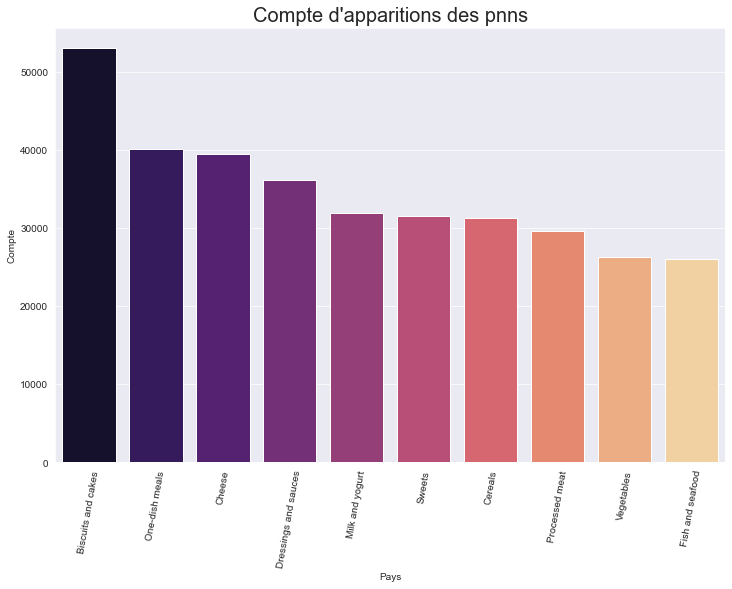

In [6]:
#Visualisation de la représentation des pnns
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.countplot(data=df_eda, x='pnns_groups_2', order=pnns_, palette='magma')
plt.xticks(rotation=80)
plt.xlabel('Pays')
plt.ylabel('Compte')
plt.title("Compte d'apparitions des pnns", fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/hist_pnn10.png', bbox_inches='tight')
plt.show()

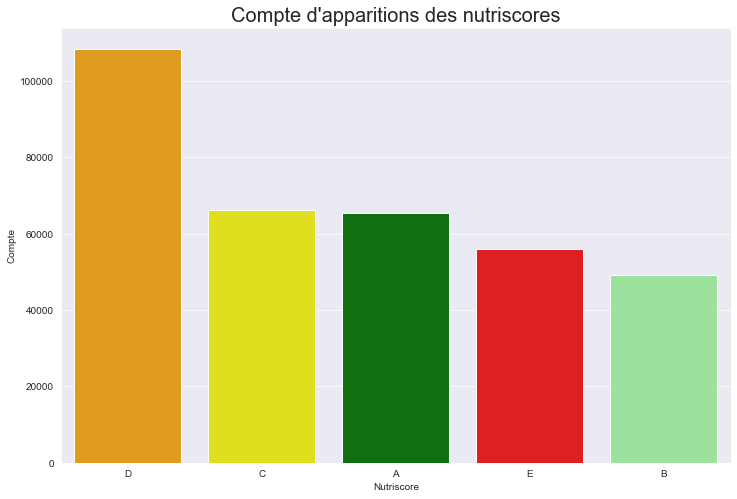

In [9]:
#Visualisation de la représentation des nutriscores dans les 10 pnns les plus représentés
plt.figure(figsize=(12, 8))
sns.countplot(data=df_eda, x='nutriscore_adjusted', order=df_eda['nutriscore_adjusted'].value_counts().index, 
              palette=['orange', 'yellow', 'green', 'red', 'lightgreen'])
plt.xlabel('Nutriscore')
plt.ylabel('Compte')
plt.title("Compte d'apparitions des nutriscores", fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/hist_nutriscore.png', bbox_inches='tight')
plt.show()

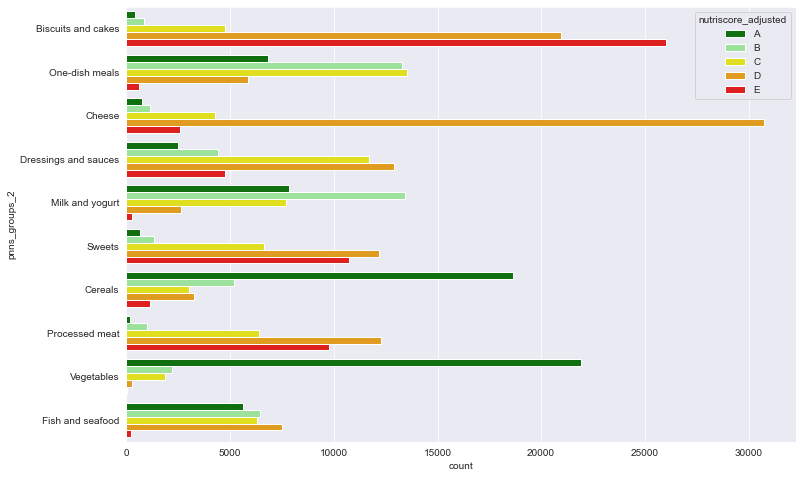

In [10]:
#Visualisation de la représentation des nutriscores pour chaque pnn
plt.figure(figsize=(12, 8))
sns.countplot(data=df_eda, y='pnns_groups_2', hue='nutriscore_adjusted', order=pnns_,
              hue_order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/hist_pnn_nutriscore.png', bbox_inches='tight')

- Visualisation de la distribution des valeurs nutritionnelles pour chaque nutriscore

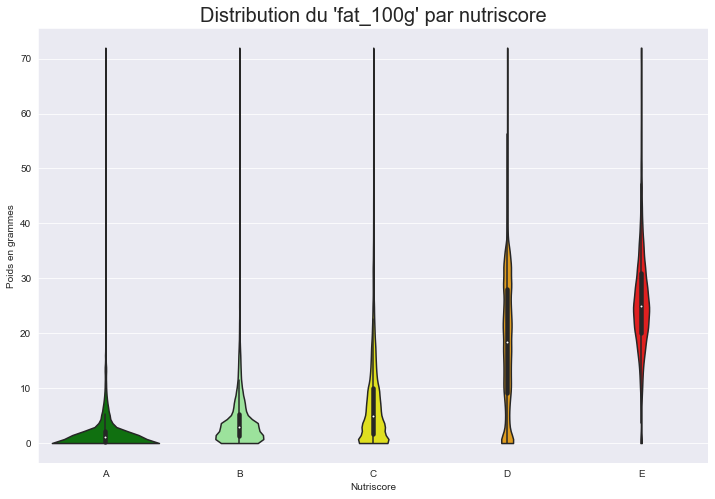

In [11]:
#Fat
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_eda, x='nutriscore_adjusted', y='fat_100g', order=['A', 'B', 'C', 'D', 'E'],
               palette=['green', 'lightgreen', 'yellow', 'orange', 'red'], cut=0)
plt.xlabel('Nutriscore')
plt.ylabel('Poids en grammes')
plt.title("Distribution du 'fat_100g' par nutriscore", fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

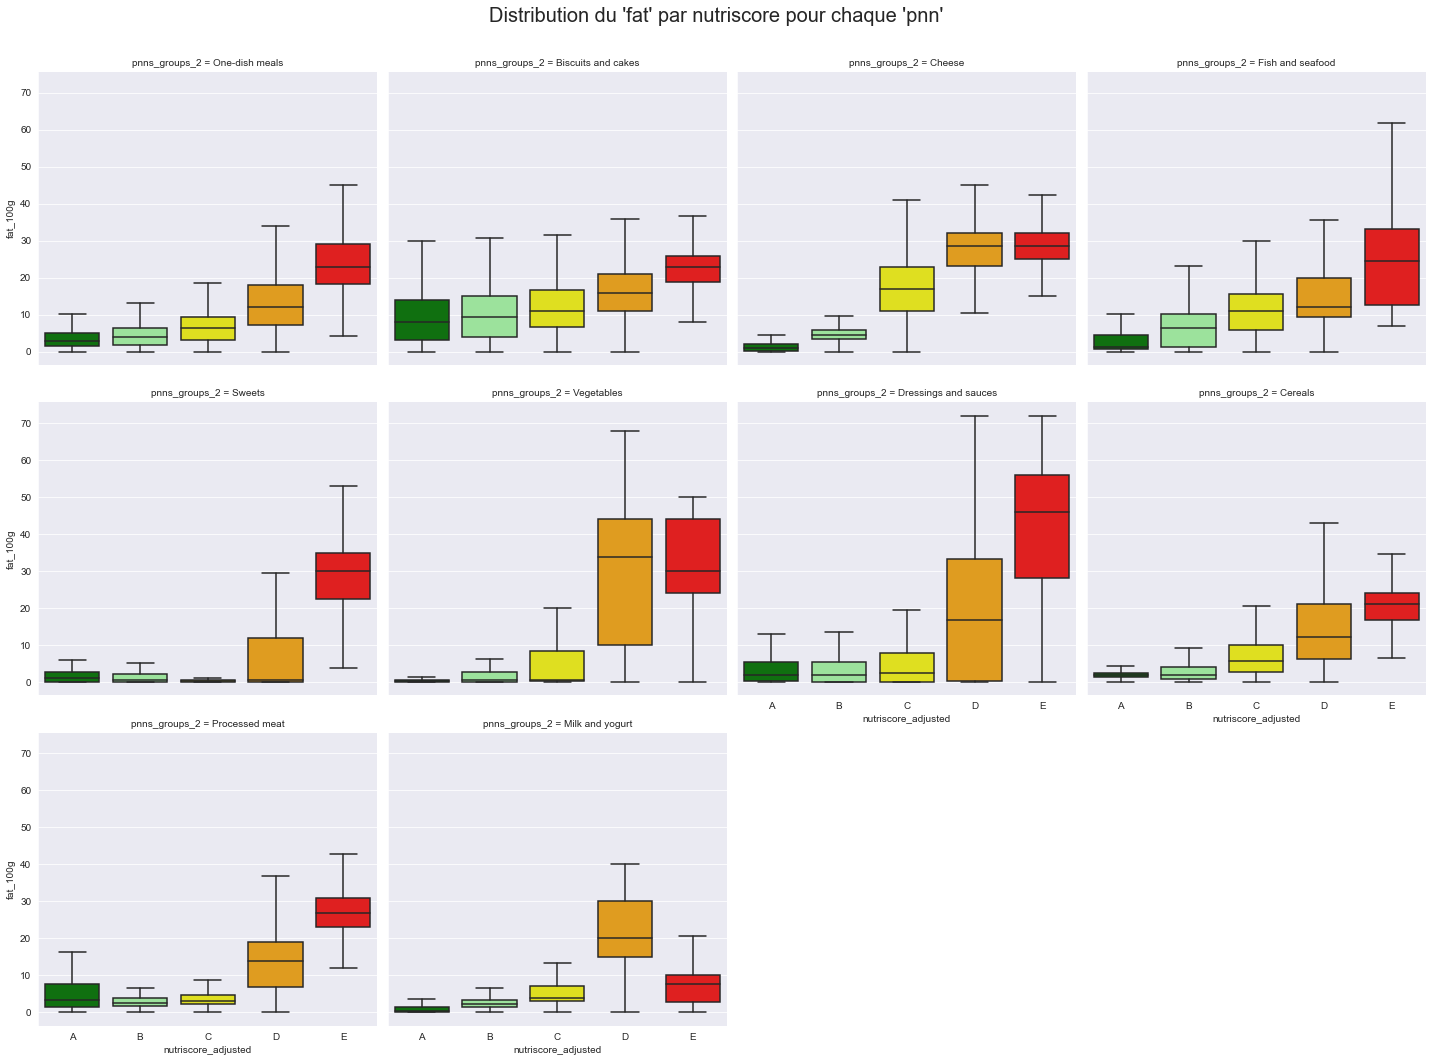

In [7]:
#Visualisation du 'fat' pour chaque pnn par nutriscore
plt.figure(figsize=(12, 8))
g = sns.catplot(data=df_eda, x='nutriscore_adjusted', y='fat_100g', order=['A', 'B', 'C', 'D', 'E'],
                palette=['green', 'lightgreen', 'yellow', 'orange', 'red'], col='pnns_groups_2', col_wrap=4, kind='box',
                showfliers=False)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Distribution du 'fat' par nutriscore pour chaque 'pnn'", fontsize=20)
g.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/catbox_fat.png', bbox_inches='tight')
plt.show()

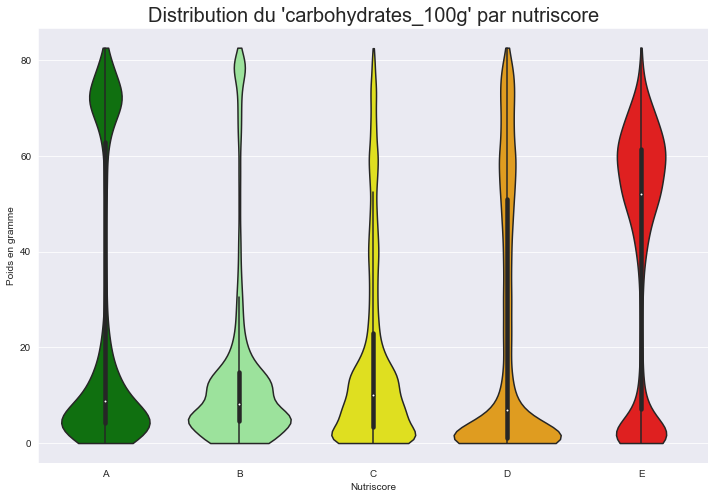

In [13]:
#Carbohydrates
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_eda, x='nutriscore_adjusted', y='carbohydrates_100g', order=['A', 'B', 'C', 'D', 'E'],
               palette=['green', 'lightgreen', 'yellow', 'orange', 'red'], cut=0)
plt.xlabel('Nutriscore')
plt.ylabel('Poids en gramme')
plt.title("Distribution du 'carbohydrates_100g' par nutriscore", fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

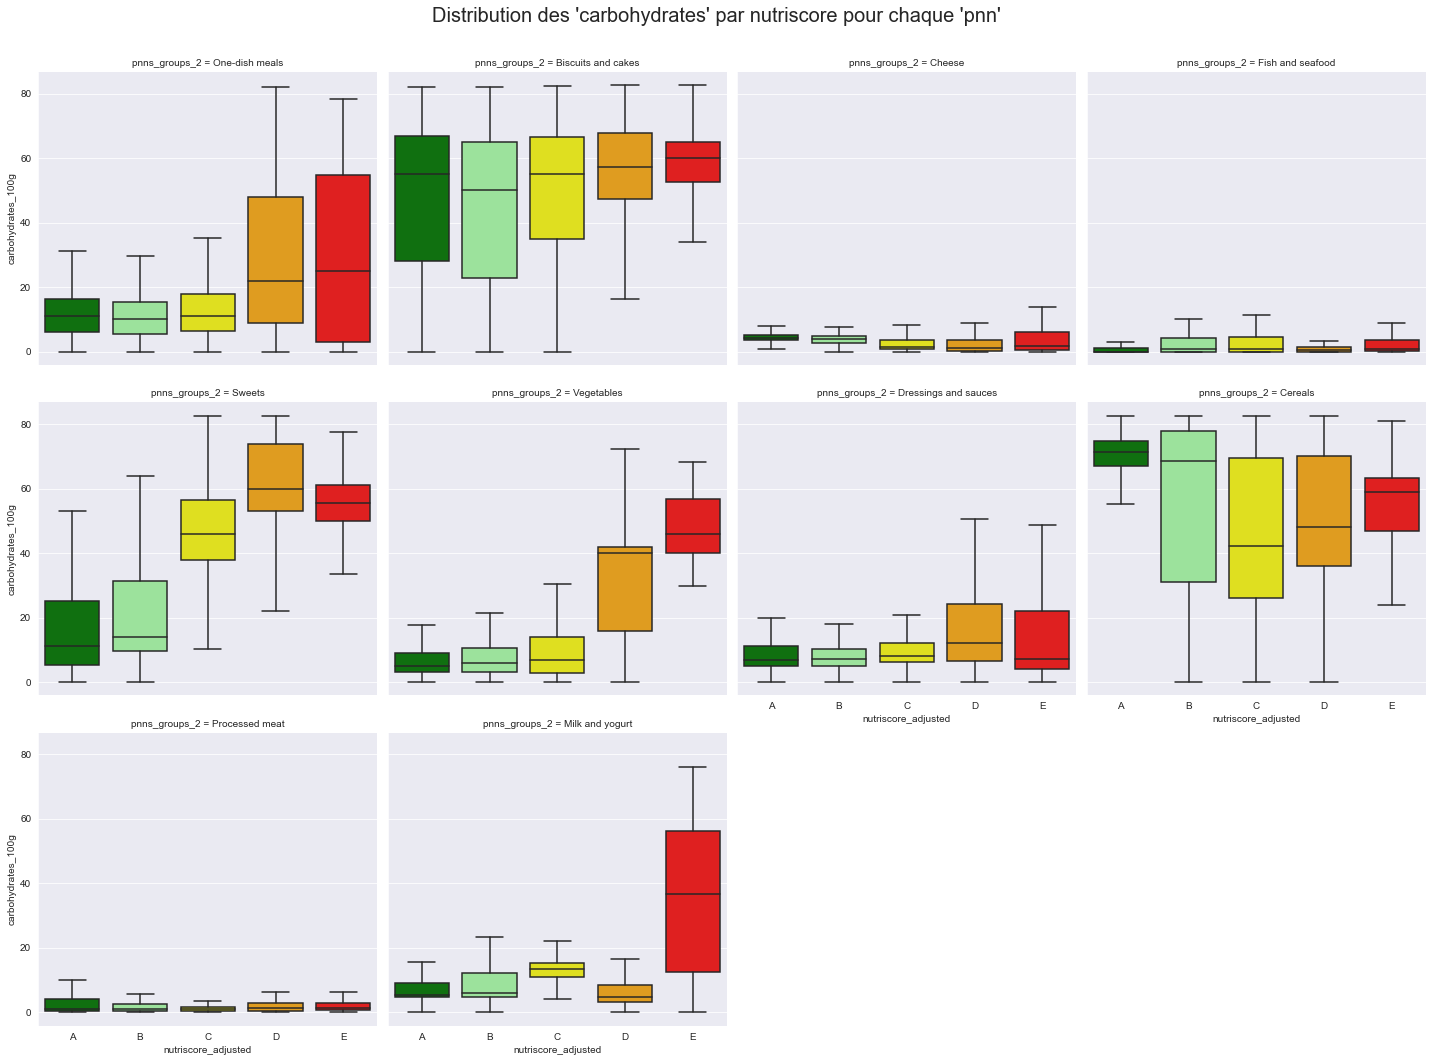

In [8]:
#Visualisation des 'carbohydrates' pour chaque pnn par nutriscore
plt.figure(figsize=(12, 8))
g = sns.catplot(data=df_eda, x='nutriscore_adjusted', y='carbohydrates_100g', order=['A', 'B', 'C', 'D', 'E'],
                palette=['green', 'lightgreen', 'yellow', 'orange', 'red'], col='pnns_groups_2', col_wrap=4, kind='box',
                showfliers=False)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Distribution des 'carbohydrates' par nutriscore pour chaque 'pnn'", fontsize=20)
g.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/catbox_carb.png', bbox_inches='tight')
plt.show()

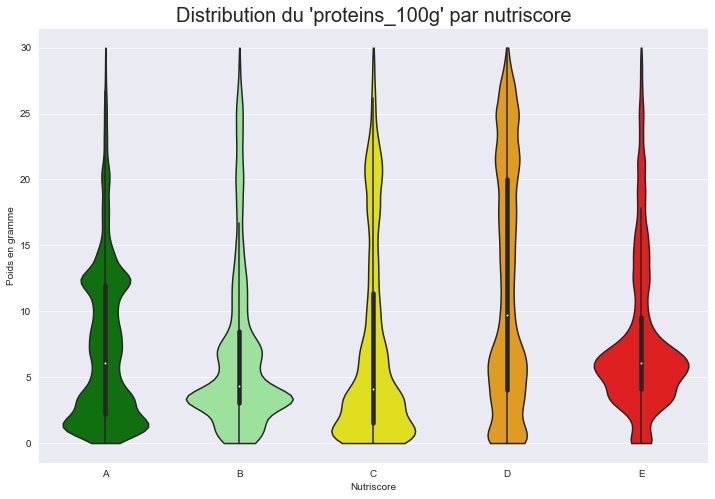

In [15]:
#Proteins
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_eda, x='nutriscore_adjusted', y='proteins_100g', order=['A', 'B', 'C', 'D', 'E'],
               palette=['green', 'lightgreen', 'yellow', 'orange', 'red'], cut=0)
plt.xlabel('Nutriscore')
plt.ylabel('Poids en gramme')
plt.title("Distribution du 'proteins_100g' par nutriscore", fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

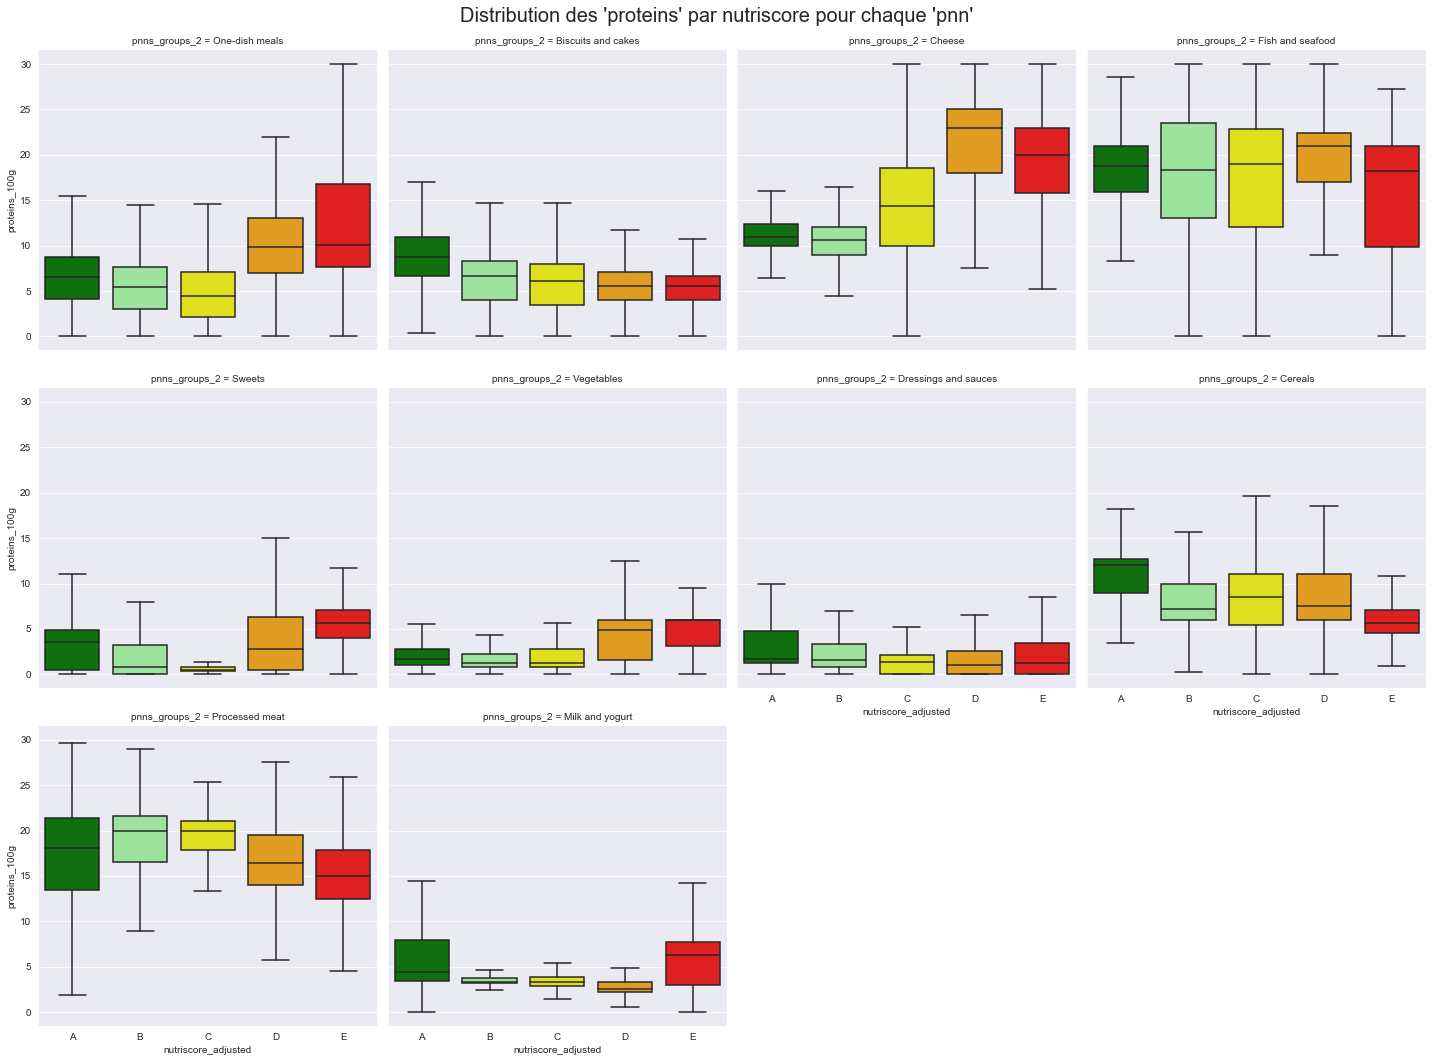

In [9]:
#Visualisation des 'proteins' pour chaque pnn par nutriscore
plt.figure(figsize=(12, 8))
g = sns.catplot(data=df_eda, x='nutriscore_adjusted', y='proteins_100g', order=['A', 'B', 'C', 'D', 'E'],
                palette=['green', 'lightgreen', 'yellow', 'orange', 'red'], col='pnns_groups_2', col_wrap=4, kind='box',
               showfliers=False)
g.fig.subplots_adjust(top=0.94)
g.fig.suptitle("Distribution des 'proteins' par nutriscore pour chaque 'pnn'", fontsize=20)
g.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/catbox_prot.png', bbox_inches='tight')
plt.show()

- Le nutriscore D étant le plus représenté, intéressons nous aux relations entre les valeurs nutritionnelles pour ce nutriscore

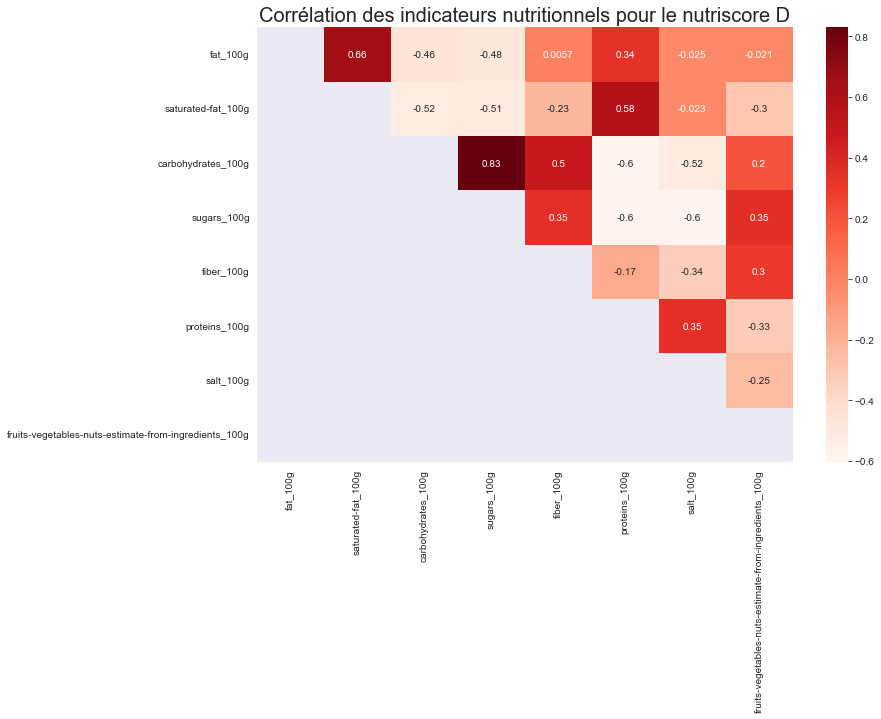

In [17]:
corr = df_eda.loc[df_eda['nutriscore_adjusted']=='D', ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                                                       'fiber_100g', 'proteins_100g', 'salt_100g', 
                                                       'fruits-vegetables-nuts-estimate-from-ingredients_100g']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Reds', mask=np.tril(np.ones_like(corr, dtype=bool)))
plt.title('Corrélation des indicateurs nutritionnels pour le nutriscore D', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/corr_nutD.png', bbox_inches='tight')

- Intéressons nous à la normalité des distributions des valeurs nutritionnelles

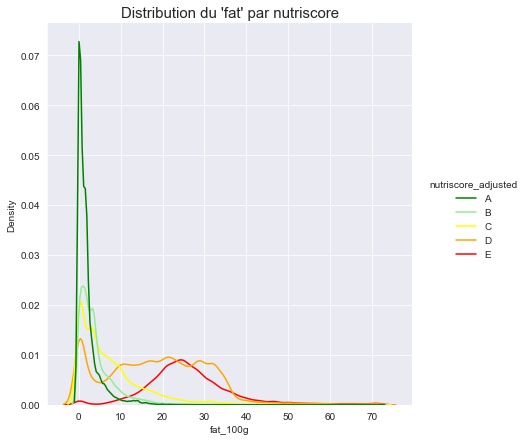

In [10]:
sns.displot(data=df_eda, x='fat_100g', hue='nutriscore_adjusted', kind='kde', height=6,
            hue_order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title("Distribution du 'fat' par nutriscore", fontsize=15)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/dist_fat.png', bbox_inches='tight')
plt.show()

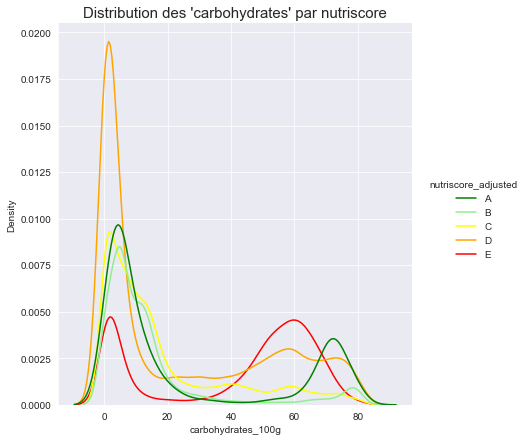

In [11]:
sns.displot(data=df_eda, x='carbohydrates_100g', hue='nutriscore_adjusted', kind='kde', height=6,
            hue_order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title("Distribution des 'carbohydrates' par nutriscore", fontsize=15)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/dist_carb.png', bbox_inches='tight')
plt.show()

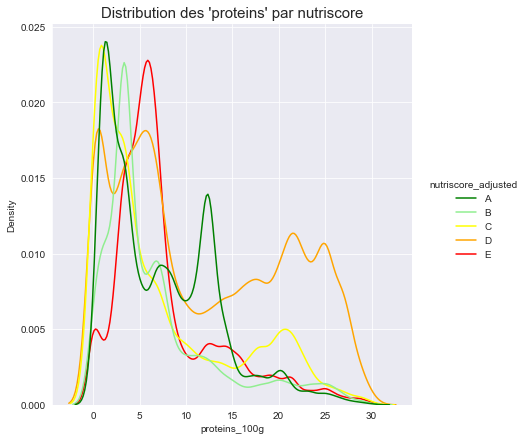

In [12]:
sns.displot(data=df_eda, x='proteins_100g', hue='nutriscore_adjusted', kind='kde', height=6,
            hue_order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title("Distribution des 'proteins' par nutriscore", fontsize=15)
plt.show()

In [21]:
df_eda.columns

Index(['code', 'product_name', 'brands', 'categories_en', 'countries_en',
       'additives_n', 'nutriscore_grade', 'pnns_groups_2', 'food_groups_en',
       'states_en', 'ecoscore_grade', 'main_category_en', 'energy-kcal_100g',
       'energy_100g', 'nutrition-score-fr_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'energy-kcal_100g_adj', 'energy-kJ_100g', 'nutriscore_adjusted'],
      dtype='object')

## 5/ Tests statistiques

- Intéressons nous à l'indicateur nutritionnelle 'proteins_100g'<br>
Plusieurs tests statistiques nous permettent de vérifier la normalité de la distribution : test de Jarque-Bera et test de D'Agostino<br>
Les tests seront réalisés sous l'hypothèse H0: la distribution suit une loi normale, avec un niveau de confiance de 95%

In [22]:
from scipy import stats
import pylab

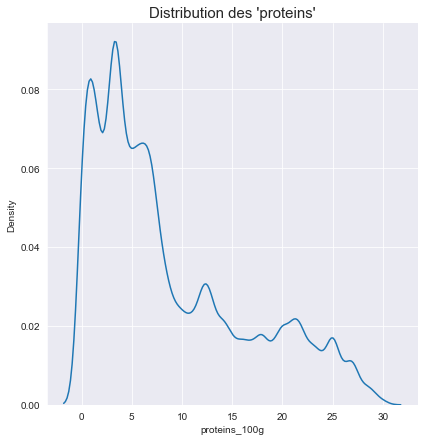

In [13]:
#Visualisation de la distribution
sns.displot(data=df_eda, x='proteins_100g', kind='kde', height=6)
plt.title("Distribution des 'proteins'", fontsize=15)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/dist_prot.png', bbox_inches='tight')

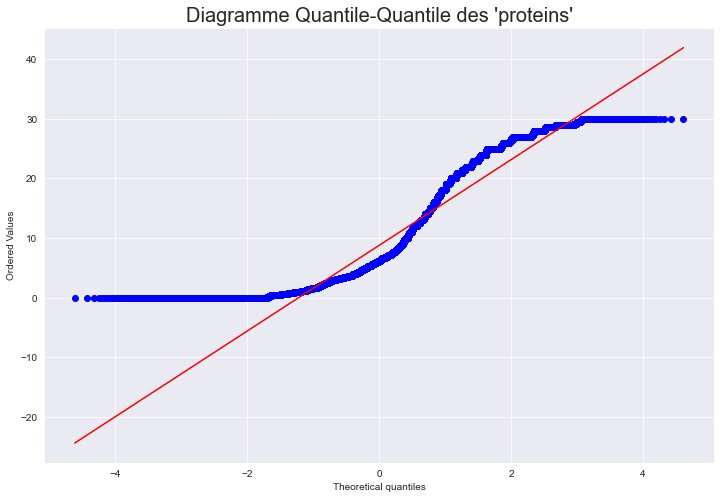

In [24]:
#Visualisation du diagramme Quantile-Quantile
plt.figure(figsize=(12, 8))
stats.probplot(df_eda['proteins_100g'], dist="norm", plot=pylab)
plt.title("Diagramme Quantile-Quantile des 'proteins'", fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/QQ.png', bbox_inches='tight')
pylab.show()

In [25]:
#Test de d'Agostino
k, p = stats.normaltest(df_eda['proteins_100g'])
if p < 0.05:
    print("p-value = {}. On rejette l'hypothèse H0, la distribution ne suit pas une loi normale".format(p))
else:
    print("p-value = {}. On ne rejette pas l'hypothèse H0, la distribution suit une loi normale".format(p))

p-value = 0.0. On rejette l'hypothèse H0, la distribution ne suit pas une loi normale


In [26]:
#Test de Jarque-Bera
jarque, p = stats.jarque_bera(df_eda['proteins_100g'])
if p < 0.05:
    print("p-value = {}. On rejette l'hypothèse H0, la distribution ne suit pas une loi normale".format(p))
else:
    print("p-value = {}. On ne rejette pas l'hypothèse H0, la distribution suit une loi normale".format(p))

p-value = 0.0. On rejette l'hypothèse H0, la distribution ne suit pas une loi normale


- Notre distribution ne suivant une loi normale, nous allons utilisé la version non paramètrique du test de l'ANOVA : test de Kruskal-Wallis<br>
Le test sera réalisé sous l'hypothèse H0: la distribution est la même dans tous les groupes, avec un niveau de confiance de 95%

In [27]:
prot_A = df_eda.loc[df_eda['nutriscore_adjusted']=='A', 'proteins_100g'].tolist()
prot_B = df_eda.loc[df_eda['nutriscore_adjusted']=='B', 'proteins_100g'].tolist()
prot_C = df_eda.loc[df_eda['nutriscore_adjusted']=='C', 'proteins_100g'].tolist()
prot_D = df_eda.loc[df_eda['nutriscore_adjusted']=='D', 'proteins_100g'].tolist()
prot_E = df_eda.loc[df_eda['nutriscore_adjusted']=='E', 'proteins_100g'].tolist()

In [28]:
kruk, p = stats.kruskal(prot_A, prot_B, prot_C, prot_D, prot_E)
if p < 0.05:
    print("p-value = {}. On rejette l'hypothèse H0, la distribution n'est pas la même dans tous les groupes".format(p))
else:
    print("p-value = {}. On ne rejette pas l'hypothèse H0, la distribution est la même dans tous les groupes".format(p))

p-value = 0.0. On rejette l'hypothèse H0, la distribution n'est pas la même dans tous les groupes


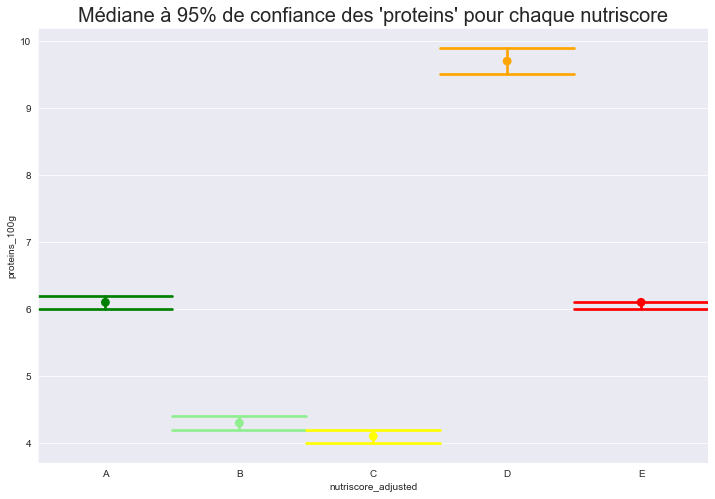

In [29]:
#Visualisation des médianes des groupes à ci=95%
plt.figure(figsize=(12, 8))
sns.pointplot(data=df_eda, x='nutriscore_adjusted', y='proteins_100g', join=False,
              order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'],
              estimator=median, capsize=1)
plt.title("Médiane à 95% de confiance des 'proteins' pour chaque nutriscore", fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/point_prot.png', bbox_inches='tight')
plt.show()

## 6/ ACP

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_kmo

In [31]:
data_copy = data.copy()

In [33]:
#Sélection des colonnes à conserver pour l'ACP
cols_to_scale = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
                 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
                 'energy-kcal_100g_adj']

In [34]:
#Standardisation du jeu de données
scaler = StandardScaler()

df_scaled = scaler.fit_transform(data_copy[cols_to_scale])

In [35]:
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_scale)
df_scaled

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy-kcal_100g_adj
0,-0.876699,-0.730796,-0.835962,-0.459749,-0.345891,0.278304,-0.858103,0.473285,-1.088978
1,-0.869108,-0.730796,-0.779394,-0.459749,-0.718545,-0.963700,-0.489210,0.478692,-1.265467
2,0.778077,1.851978,0.109530,0.753860,1.304438,-0.458709,-0.858103,0.392185,0.548105
3,-0.891880,-0.747567,0.461060,1.097716,0.878546,-1.004645,-0.981068,0.716587,-0.547341
4,0.072140,-0.579855,-0.835962,-0.655275,-0.345891,-0.827216,-0.612174,0.657113,-0.596027
...,...,...,...,...,...,...,...,...,...
643353,1.157612,2.103547,-0.225837,0.490911,-0.452363,-0.267632,-0.735139,-0.148485,0.651564
643354,-0.853927,-0.747567,2.238909,-0.722698,1.783565,-0.131148,-0.981068,-0.499920,0.706336
643355,0.641444,0.258708,0.254991,-0.021502,0.239710,-0.076554,0.371541,-0.083604,0.602878
643356,-0.314986,0.057453,0.420654,0.895447,-0.186181,-0.731677,-0.612174,0.148884,-0.103077


In [36]:
#Calcul de l'indice KMO pour vérifier la compressibilité des données
kmo_all, kmo_model = calculate_kmo(df_scaled)
print('Overall KMO : {}'.format(kmo_model))
pd.DataFrame(index=cols_to_scale, data=kmo_all, columns=['KMO']).sort_values(by='KMO')

Overall KMO : 0.38584199620485526


,KMO
proteins_100g,0.174160
carbohydrates_100g,0.257253
fat_100g,0.321055
energy-kcal_100g_adj,0.384549
fruits-vegetables-nuts-estimate-from-ingredients_100g,0.593242
fiber_100g,0.716557
salt_100g,0.814532
sugars_100g,0.826133
saturated-fat_100g,0.891356


In [37]:
#Réalisation de l'ACP
pca = PCA()
df_acp = pca.fit_transform(df_scaled)

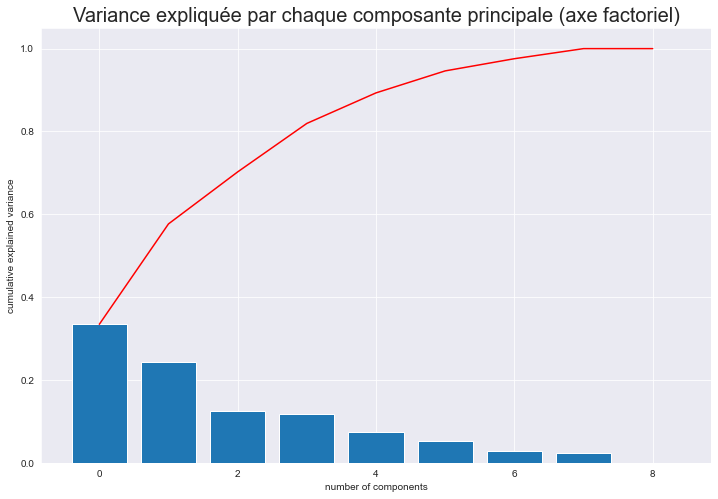

In [38]:
#Visualisation de la variance expliquée par chaque axe factoriel
plt.figure(figsize=(12, 8))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, align='center')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance expliquée par chaque composante principale (axe factoriel)', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/var_acp.png', bbox_inches='tight')

In [39]:
df_acp = pd.DataFrame(df_acp, columns=['CP{}'.format(i+1) for i in range(len(pca.components_))])
full_df_acp = pd.concat([df_scaled, df_acp], axis=1)

In [40]:
#Calcul de la corrélation de chaque variable avec les axes factoriels
corr_table = pd.DataFrame(index=cols_to_scale, columns=df_acp.columns)

for m in corr_table.index:
    for c in corr_table.columns:
        corr, t = stats.pearsonr(full_df_acp[m], full_df_acp[c])
        
        corr_table.loc[m, c] = corr

corr_table = corr_table.astype('float')
corr_table

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9
fat_100g,0.829624,-0.286048,-0.164435,0.307767,0.007515,-0.239409,-0.067099,0.215093,-6.239008e-04
saturated-fat_100g,0.751403,-0.292822,-0.420729,0.155064,-0.143371,-0.005642,0.165584,-0.317152,1.208638e-08
carbohydrates_100g,0.493002,0.718911,0.169714,-0.327076,0.140994,0.066834,-0.221468,-0.175896,-5.209312e-04
sugars_100g,0.392439,0.698965,-0.376954,-0.066145,0.148922,0.321823,0.236837,0.170674,4.004777e-08
fiber_100g,0.382939,0.407155,0.738686,0.136139,-0.107960,-0.196533,0.270057,-0.013454,-7.252927e-09
proteins_100g,0.412470,-0.597655,0.397452,-0.014479,-0.267068,0.489854,-0.037562,0.042489,-1.542039e-04
salt_100g,0.216692,-0.641185,0.193542,-0.209238,0.670052,0.013444,0.103208,-0.029755,7.356921e-09
fruits-vegetables-nuts-estimate-from-ingredients_100g,-0.237573,0.245263,0.104226,0.872041,0.259115,0.178176,-0.084040,-0.078338,3.871743e-08
energy-kcal_100g_adj,0.969253,0.120114,0.054508,0.022402,0.042718,-0.045148,-0.188564,0.056811,8.645972e-04


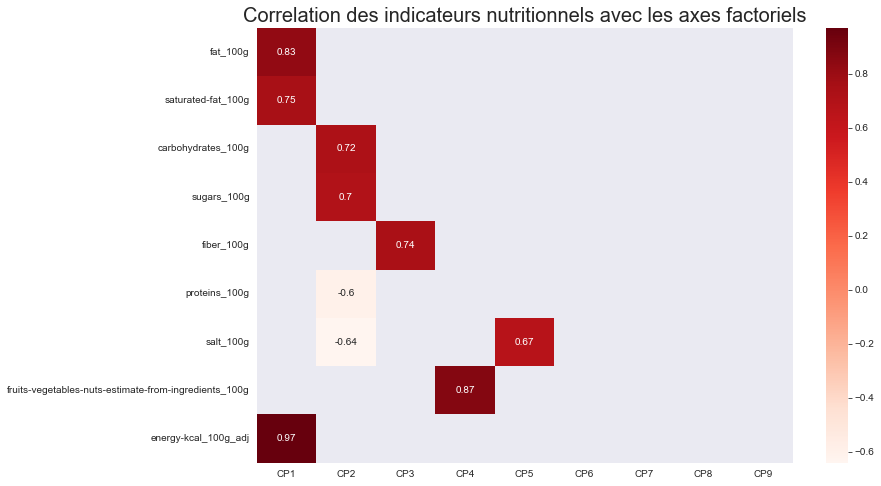

In [41]:
#Visualisation des corrélations
plt.figure(figsize=(12,8))
sns.heatmap(corr_table[(corr_table >= 0.5) | (corr_table <= -0.5)], annot=True, cmap='Reds')
plt.title('Correlation des indicateurs nutritionnels avec les axes factoriels', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/corr_acp.png', bbox_inches='tight')

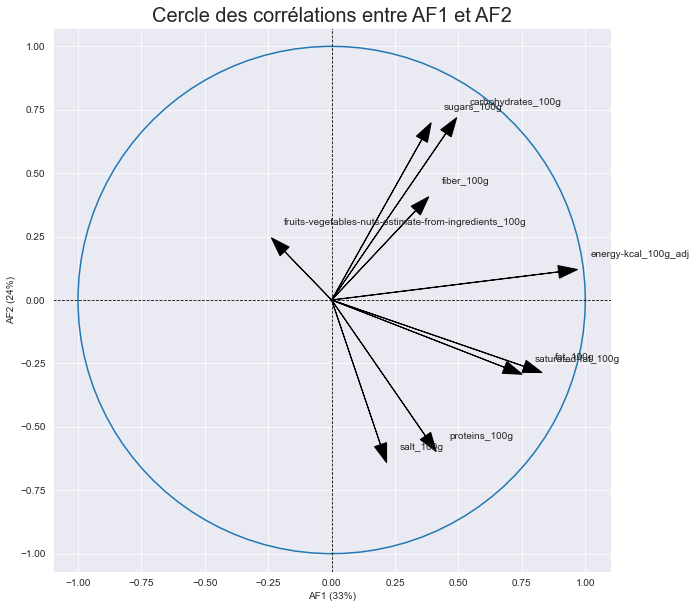

In [42]:
#Cercle des corrélations entre les variables et les axes factoriels
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, corr_table.shape[0]):
    ax.arrow(0,
             0, 
             corr_table.iloc[i, 0],  #chiffre]: index de l'axe factoriel
             corr_table.iloc[i, 1],  #chiffre]: index de l'axe factoriel
             head_width=0.05, length_includes_head=True, color='black')

    plt.text(corr_table.iloc[i, 0] + 0.05, #chiffre]: index de l'axe factoriel
             corr_table.iloc[i, 1] + 0.05, #chiffre]: index de l'axe factoriel
             cols_to_scale[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.axis('equal')
plt.xlabel("AF1 (%s%%)" % str(pca.explained_variance_ratio_[0])[:4].lstrip("0.")) #[chiffre]: index de l'axe factoriel
plt.ylabel("AF2 (%s%%)" % str(pca.explained_variance_ratio_[1])[:4].lstrip("0.")) #[chiffre]: index de l'axe factoriel
ax.set_title('Cercle des corrélations entre AF1 et AF2', fontsize=20)
fig.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/corr_circle.png', bbox_inches='tight')
plt.show()

In [43]:
#Ajout des colonnes nécessaires pour la visualisation
df_acp['countries_en'] = data_copy['countries_en']
df_acp['pnns_groups_2'] = data_copy['pnns_groups_2']
df_acp['nutriscore_adjusted'] = data_copy['nutriscore_adjusted']

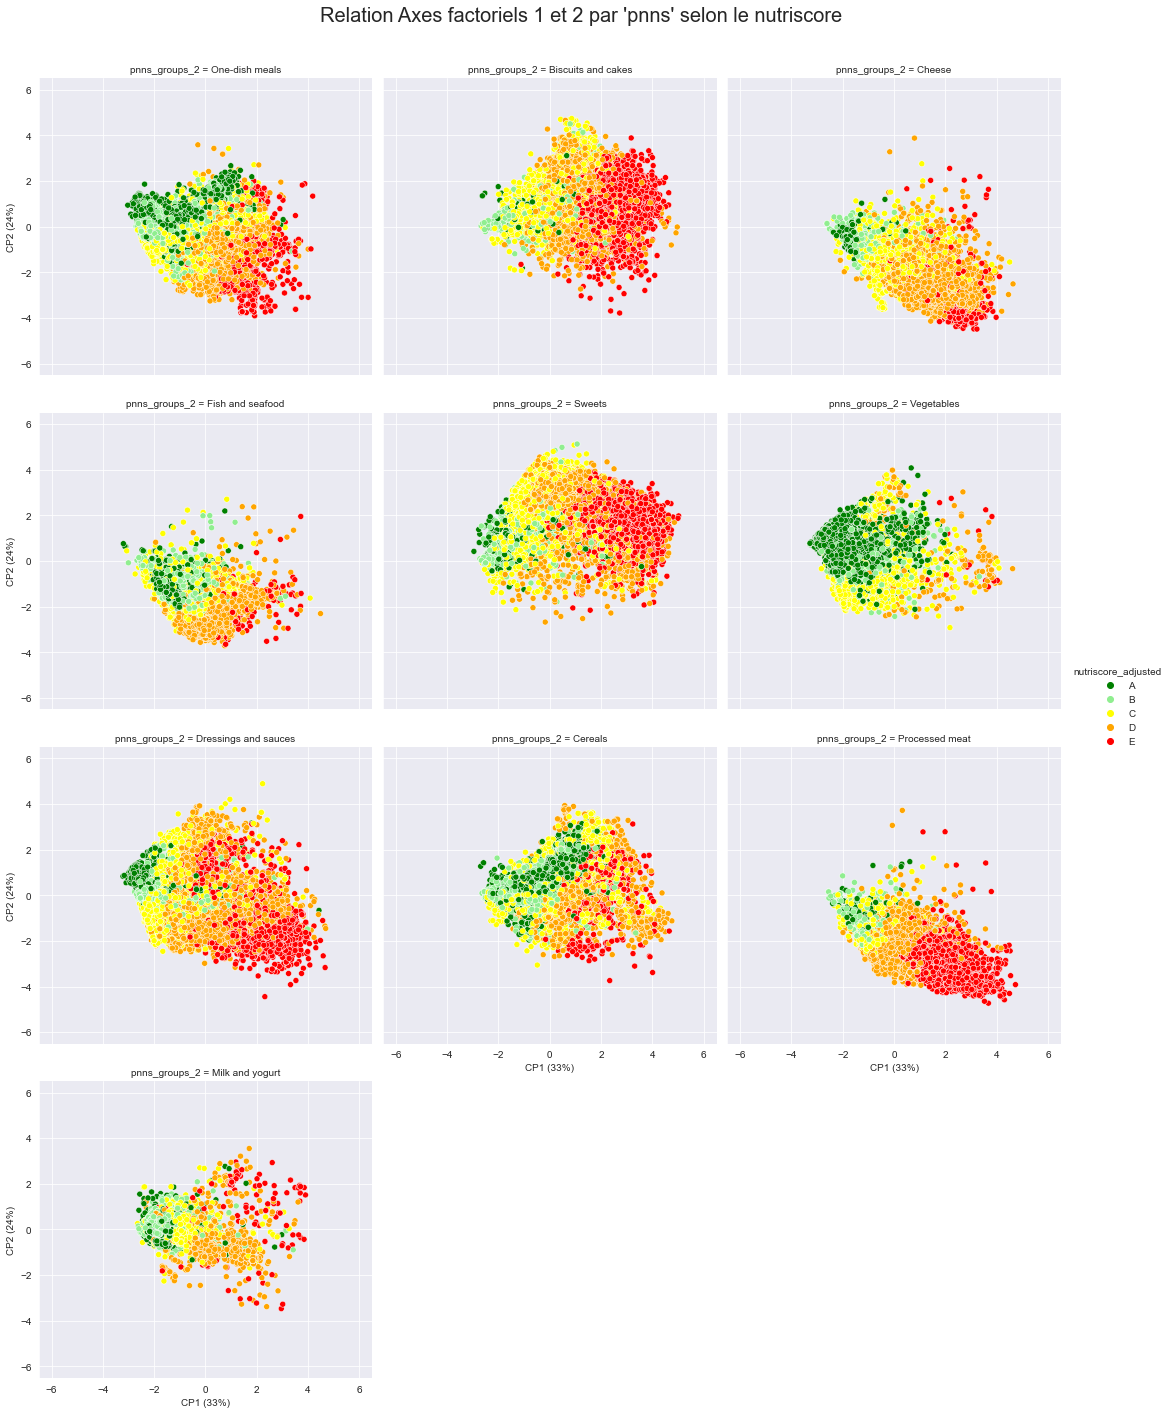

In [44]:
#Visualisaton des axes factoriels 1 et 2 par pays selon le nutriscore
g = sns.relplot(data=df_acp[df_acp['pnns_groups_2'].isin(pnns_)], x='CP1', y='CP2', 
                hue='nutriscore_adjusted', 
                hue_order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'],
                col='pnns_groups_2', col_wrap=3)
g.set(ylim=(-6.5, 6.5), xlim=(-6.5, 6.5))
g.set_xlabels("CP1 (%s%%)" % str(pca.explained_variance_ratio_[0])[:4].lstrip("0."))
g.set_ylabels("CP2 (%s%%)" % str(pca.explained_variance_ratio_[1])[:4].lstrip("0."))
g.fig.suptitle("Relation Axes factoriels 1 et 2 par 'pnns' selon le nutriscore", fontsize=20)
g.fig.subplots_adjust(top=0.93)
g.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/rel_acp_pnn.png', bbox_inches='tight')
plt.show()

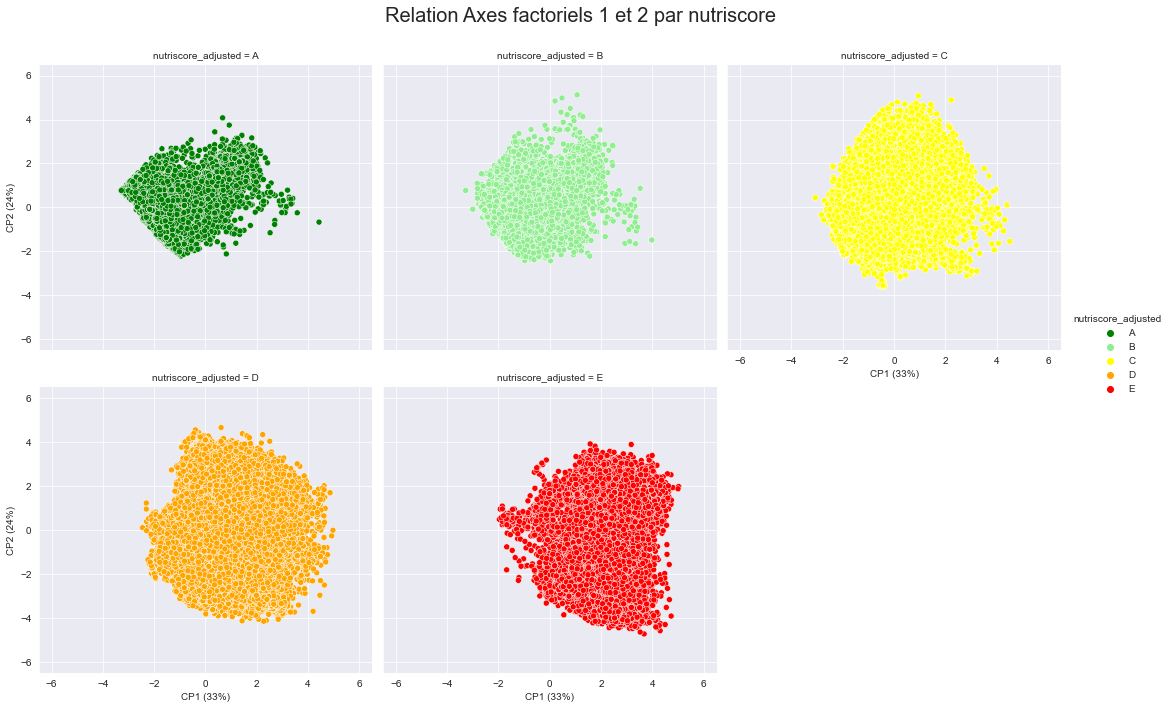

In [45]:
#Visualisaton des axes factoriels 1 et 2 par pays selon le nutriscore
g = sns.relplot(data=df_acp[df_acp['pnns_groups_2'].isin(pnns_)], x='CP1', y='CP2',
                hue='nutriscore_adjusted', 
                hue_order=['A', 'B', 'C', 'D', 'E'], palette=['green', 'lightgreen', 'yellow', 'orange', 'red'],
                col='nutriscore_adjusted', col_order=['A', 'B', 'C', 'D', 'E'], col_wrap=3)
g.set(ylim=(-6.5, 6.5), xlim=(-6.5, 6.5))
g.set_xlabels("CP1 (%s%%)" % str(pca.explained_variance_ratio_[0])[:4].lstrip("0."))
g.set_ylabels("CP2 (%s%%)" % str(pca.explained_variance_ratio_[1])[:4].lstrip("0."))
g.fig.suptitle("Relation Axes factoriels 1 et 2 par nutriscore", fontsize=20)
g.fig.subplots_adjust(top=0.9)
g.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/rel_acp_nut.png', bbox_inches='tight')
plt.show()

## Bonus

- Réalisation d'un modèle KNN pour vérifier la faisabilité d'estimer le nutriscore

In [46]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#Test sur le groupe pnn le plus représenté
data_knn = data[data['pnns_groups_2']=='Biscuits and cakes'].copy()

In [48]:
#Séparation du jeu de données : colonne à prédire
target = data_knn['nutriscore_adjusted']
X = data_knn[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
              'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
              'energy-kcal_100g_adj']].values

In [49]:
#Séparation du jeu de données en jeu d'entrainement et de test
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.2)

In [53]:
#Recherche des meilleurs paramètres du modèle
params_grid = {'n_neighbors': range(1, 10),
               'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5)
grid.fit(X_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 10)})

In [54]:
#Meilleurs paramètres
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [55]:
#Score du modèle
model = grid.best_estimator_
model.score(X_test, target_test)

0.8359898142035272

- Le modèle estime le bon nutriscore dans 84% des cas